In [1]:
import scanpy as sc
import scvi
import mplscience

/home/cane/miniconda3/envs/resolvi_new/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/cane/miniconda3/envs/resolvi_new/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/cane/miniconda3/envs/resolvi_new/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
scvi.__version__
scvi.settings.seed = 0

Global seed set to 0


In [5]:
!curl -o ../prostate_visium.h5 https://cf.10xgenomics.com/samples/spatial-exp/2.0.0/Visium_FFPE_Human_Prostate_IF/Visium_FFPE_Human_Prostate_IF_filtered_feature_bc_matrix.h5
!curl -o ../spatial.tar.gz https://cf.10xgenomics.com/samples/spatial-exp/2.0.0/Visium_FFPE_Human_Prostate_IF/Visium_FFPE_Human_Prostate_IF_spatial.tar.gz
!tar -xf ../spatial.tar.gz 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.1M  100 18.1M    0     0  14.9M      0  0:00:01  0:00:01 --:--:-- 14.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7613k  100 7613k    0     0  13.8M      0 --:--:-- --:--:-- --:--:-- 13.8M


In [9]:
!tar -xf ../spatial.tar.gz 

In [14]:
st_adata = sc.read_visium('..', genome=None, count_file='prostate_visium.h5', library_id='spatial/tissue_hires_image.png', load_images=True, source_image_path=None)

/home/cane/miniconda3/envs/resolvi_new/lib/python3.10/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/cane/miniconda3/envs/resolvi_new/lib/python3.10/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [15]:
st_adata

AnnData object with n_obs × n_vars = 3460 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [6]:
sc_adata = sc.read("Prostate/adata.h5ad")

/home/eecs/cergen/anaconda3/envs/PopV/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/home/eecs/cergen/anaconda3/envs/PopV/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/eecs/cergen/anaconda3/envs/PopV/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/eecs/cergen/anaconda3/envs/PopV/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/eecs/cergen/anaconda3/envs/PopV/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


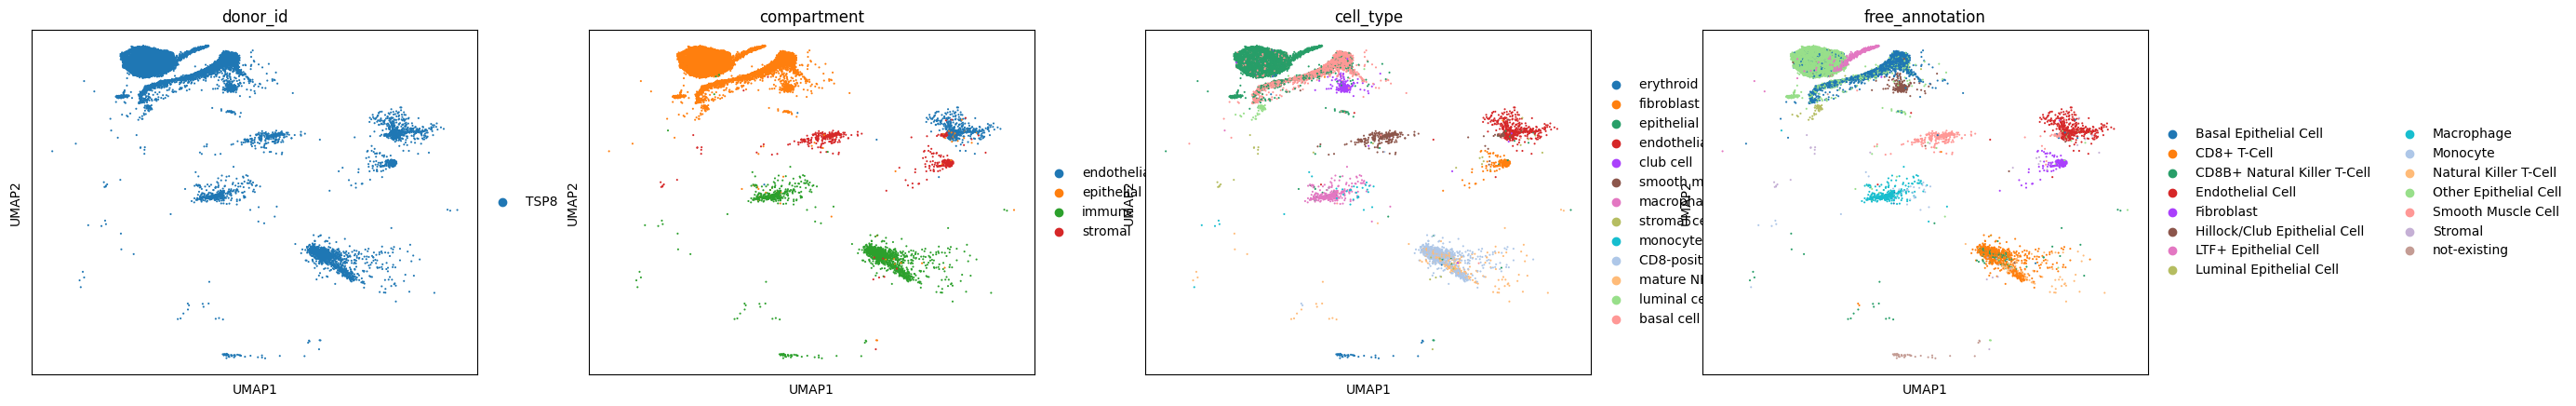

In [7]:
sc.pl.umap(sc_adata, color=['donor_id', 'compartment', 'cell_type', 'free_annotation'])

In [8]:
sc.pp.normalize_total(sc_adata)
sc.pp.log1p(sc_adata)

/home/eecs/cergen/anaconda3/envs/PopV/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


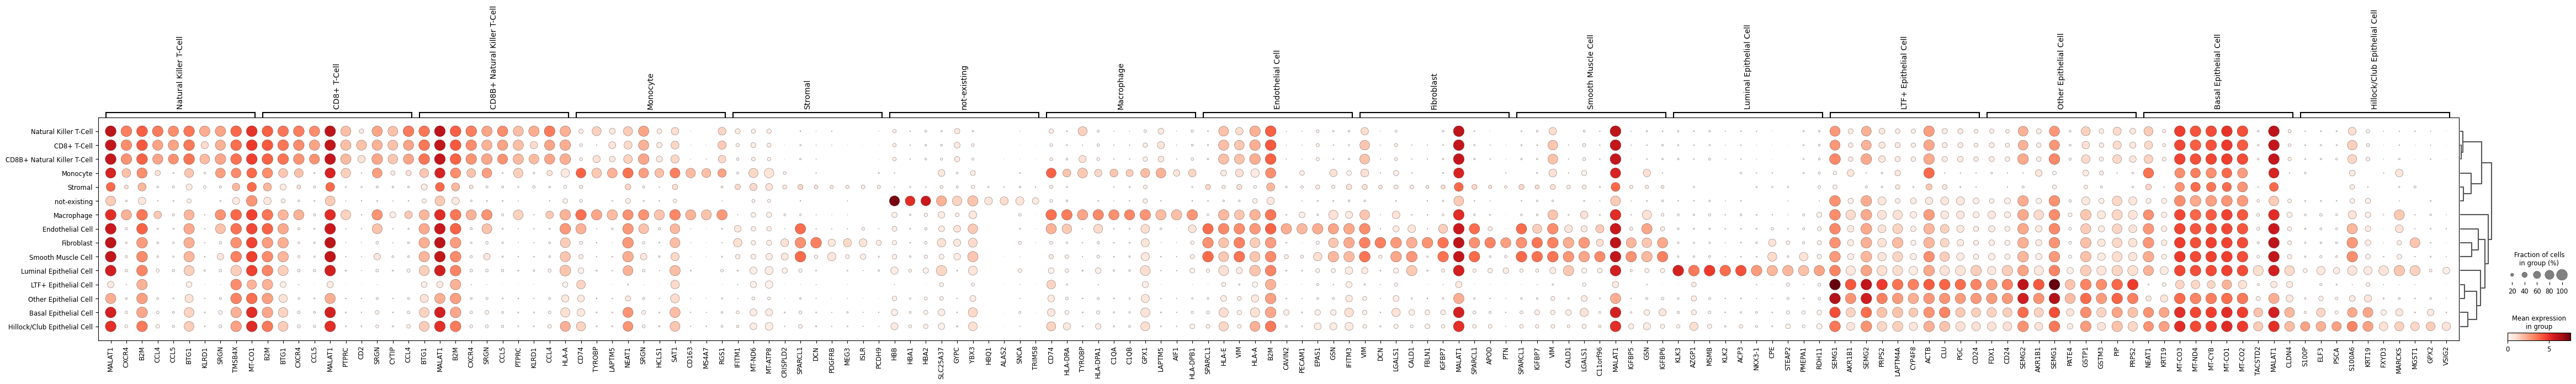

In [9]:
sc.tl.rank_genes_groups(sc_adata, groupby='free_annotation', use_raw=False)
sc.pl.rank_genes_groups_dotplot(sc_adata, use_raw=False)

In [17]:
model_url = "https://huggingface.co/scvi-tools/tabula-sapiens-prostate-condscvi/blob/main/model.pt"
scvi.data._download._download(model_url, '..', "prostate_ts.pt")

INFO     Downloading file at ../prostate_ts.pt                                                                     
Downloading...: 100%|██████████| 42/42.0 [00:00<00:00, 811.70it/s]


In [26]:
from scvi.hub import HubModel

hmo = HubModel.pull_from_huggingface_hub(
    repo_name="scvi-tools/tabula-sapiens-prostate-condscvi",
    cache_dir="../prostate",
    revision="main",
)

Fetching 3 files:  33%|███▎      | 1/3 [00:00<00:00,  5.31it/s]
model.pt: 100%|██████████| 4.57M/4.57M [00:00<00:00, 9.53MB/s]














































adata.h5ad: 100%|██████████| 487M/487M [00:10<00:00, 46.5MB/s]
Fetching 3 files: 100%|██████████| 3/3 [00:11<00:00,  3.70s/it]
README.md: 100%|██████████| 1.93k/1.93k [00:00<00:00, 12.2MB/s]


In [20]:
# Add model download here.
sc_model = scvi.model.CondSCVI.load("../prostate_ts.pt")

INFO     No backup URL provided for missing file ../prostate_ts.pt/model.pt                                        


NotADirectoryError: [Errno 20] Not a directory: '../prostate_ts.pt/model.pt'

In [12]:
import numpy as np

intersect = np.intersect1d(st_adata.var_names, sc_adata.var_names)
len(intersect), len(sc_adata.var_names), len(st_adata.var_names)

(3384, 4000, 17943)

Add missing genes in reference model here. DestVI will ignore those genes. It's important that no marker genes are missing. Here those are non-coding genes.

In [13]:
import anndata as ad

extra_genes = ad.AnnData(np.zeros([st_adata.shape[0], len(set(sc_adata.var_names) - set(intersect))]))
extra_genes.var_names = set(sc_adata.var_names) - set(intersect)
extra_genes.obs_names = st_adata.obs_names

/tmp/ipykernel_172174/1923291821.py:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  extra_genes = ad.AnnData(np.zeros([st_adata.shape[0], len(set(sc_adata.var_names) - set(intersect))]))


In [14]:
st_adata.var_names_make_unique()

In [15]:
st_adata_pre = ad.concat([st_adata, extra_genes], label='source', keys=['original', 'extra'], axis=1, merge='unique', uns_merge='unique')[:, sc_adata.var_names]

In [16]:
st_adata_pre.layers["counts"] = st_adata_pre.X.copy()

sc.pp.filter_cells(st_adata_pre, min_counts=100)
sc.pp.normalize_total(st_adata_pre, target_sum=10e4)
sc.pp.log1p(st_adata_pre)
st_adata_pre.raw = st_adata_pre

In [19]:
mplscience.set_style(reset_current=True, name="default")

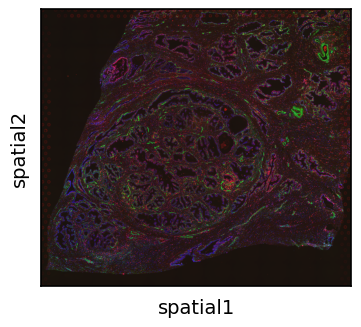

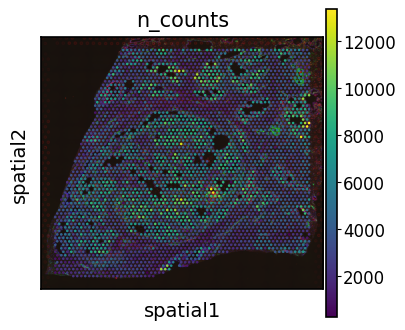

In [20]:
st_adata_pre.obsm['spatial'] = st_adata_pre.obsm['spatial'].astype(float)
sc.pl.spatial(st_adata_pre)
sc.pl.spatial(st_adata_pre, color=['n_counts'])

In [21]:
scvi.model.DestVI.setup_anndata(st_adata_pre, layer="counts")

In [22]:
st_model = scvi.model.DestVI.from_rna_model(st_adata_pre, sc_model, vamp_prior_p=5)
st_model.view_anndata_setup()

Anndata setup with scvi-tools version 0.20.0.

Setup via `DestVI.setup_anndata` with arguments:

{'layer': 'counts'}

     Summary Statistics     
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Summary Stat Key ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│     n_cells      │ 3460  │
│      n_vars      │ 4000  │
└──────────────────┴───────┘

              Data Registry              
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃  scvi-tools Location   ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │ adata.layers['counts'] │
│    ind_x     │ adata.obs['_indices']  │
└──────────────┴────────────────────────┘

In [26]:
st_model.train(max_epochs=2000, plan_kwargs={'min_kl_weight': 0.01, 'max_kl_weight': 1.})

/home/eecs/cergen/anaconda3/envs/PopV/lib/python3.8/site-packages/lightning_fabric/plugins/environments/slurm.py:166: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/eecs/cergen/anaconda3/envs/PopV/lib/python3.8/ ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/eecs/cergen/anaconda3/envs/PopV/lib/python3.8/site-packages/lightning_fabric/plugins/environments/slurm.py:166: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/eecs/cergen/anaconda3/envs/PopV/lib/python3.8/ ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]


Epoch 2000/2000: 100%|██████████████████████████████████████| 2000/2000 [29:33<00:00,  1.09it/s, loss=1.49e+07, v_num=1]

`Trainer.fit` stopped: `max_epochs=2000` reached.


Epoch 2000/2000: 100%|██████████████████████████████████████| 2000/2000 [29:33<00:00,  1.13it/s, loss=1.49e+07, v_num=1]


In [27]:
st_model.history["elbo_train"].iloc[30:].plot()

<AxesSubplot: xlabel='epoch'>

In [28]:
st_adata_pre.obsm["proportions"] = st_model.get_proportions()
st_adata_pre.obsm["proportions"].head(5)

CD8-positive, alpha-beta T cell  \
AAACAAGTATCTCCCA-1                         0.052858   
AAACAATCTACTAGCA-1                         0.040632   
AAACACCAATAACTGC-1                         0.055444   
AAACAGAGCGACTCCT-1                         0.060839   
AAACAGCTTTCAGAAG-1                         0.074433   

                    basal cell of prostate epithelium  club cell  \
AAACAAGTATCTCCCA-1                           0.046610   0.010034   
AAACAATCTACTAGCA-1                           0.074280   0.122093   
AAACACCAATAACTGC-1                           0.056894   0.032435   
AAACAGAGCGACTCCT-1                           0.069072   0.035511   
AAACAGCTTTCAGAAG-1                           0.074960   0.063810   

                    endothelial cell  epithelial cell  \
AAACAAGTATCTCCCA-1          0.105046         0.073480   
AAACAATCTACTAGCA-1          0.096143         0.073614   
AAACACCAATAACTGC-1          0.141130         0.017545   
AAACAGAGCGACTCCT-1          0.107357         0.123389   
AAACAGCTTTCAGAAG-1          0.107537         0.078628   

                    erythroid progenitor cell  fibroblast  \
AAACAAGTATCTCCCA-1                   0.222458    0.058156   
AAACAATCTACTAGCA-1                   0.234317    0.021940   
AAACACCAATAACTGC-1                   0.320425    0.058192   
AAACAGAGCGACTCCT-1                   0.209939    0.039788   
AAACAGCTTTCAGAAG-1                   0.158404    0.022188   

                    luminal cell of prostate epithelium  macrophage  \
AAACAAGTATCTCCCA-1                             0.050995    0.071090   
AAACAATCTACTAGCA-1                             0.123926    0.025358   
AAACACCAATAACTGC-1                             0.111454    0.024523   
AAACAGAGCGACTCCT-1                             0.065006    0.015568   
AAACAGCTTTCAGAAG-1                             0.064997    0.042344   

                    mature NK T cell  monocyte  smooth muscle cell  \
AAACAAGTATCTCCCA-1          0.025349  0.062388            0.040717   
AAACAATCTACTAGCA-1          0.019994  0.025922            0.022874   
AAACACCAATAACTGC-1          0.049673  0.002231            0.029587   
AAACAGAGCGACTCCT-1          0.071008  0.025360            0.037600   
AAACAGCTTTCAGAAG-1          0.042557  0.038054            0.023260   

                    stromal cell  
AAACAAGTATCTCCCA-1      0.180819  
AAACAATCTACTAGCA-1      0.118907  
AAACACCAATAACTGC-1      0.100466  
AAACAGAGCGACTCCT-1      0.139564  
AAACAGCTTTCAGAAG-1      0.208828

In [29]:
st_adata_pre.obs['sample'] = 'Visium_FFPE_Human_Prostate_IF'

In [30]:
ct_list = st_adata_pre.obsm["proportions"].columns
for ct in ct_list:
    data = st_adata_pre.obsm["proportions"][ct].values
    st_adata_pre.obs[ct] = np.clip(data, 0, np.quantile(data, 0.99))

In [42]:
ct_main = [None, 'smooth muscle cell', 'fibroblast', 'luminal cell of prostate epithelium']

In [43]:
ct_supplement = [
    'CD8-positive, alpha-beta T cell', 'basal cell of prostate epithelium',
    'club cell', 'endothelial cell', 'epithelial cell',
    'erythroid progenitor cell', 'macrophage',
    'mature NK T cell', 'monocyte', 'stromal cell']

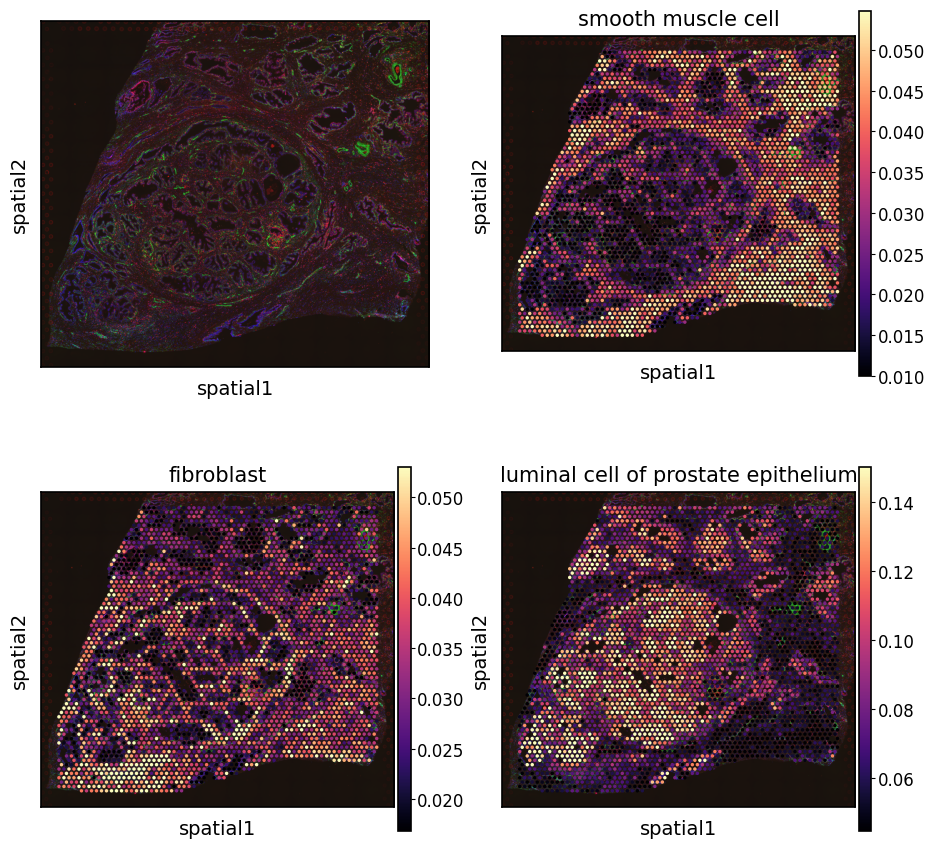

In [48]:
# select one slide
import matplotlib.pyplot as plt
from cell2location.utils import select_slide
slide = select_slide(st_adata_pre, 'Visium_FFPE_Human_Prostate_IF')

# plot in spatial coordinates
with plt.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(slide, cmap='magma',
                  # show first 8 cell types
                  color=ct_main,
                  ncols=2,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  spot_size=200, vmin=[None, 'p10', 'p10', 'p10'], vmax=[None, 'p95', 'p95', 'p95'],
                  save='main_fig_deconvolution.svg'
                 )

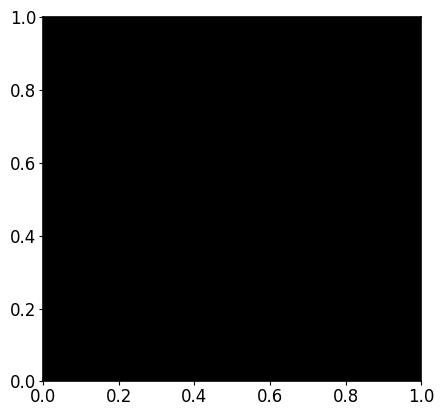

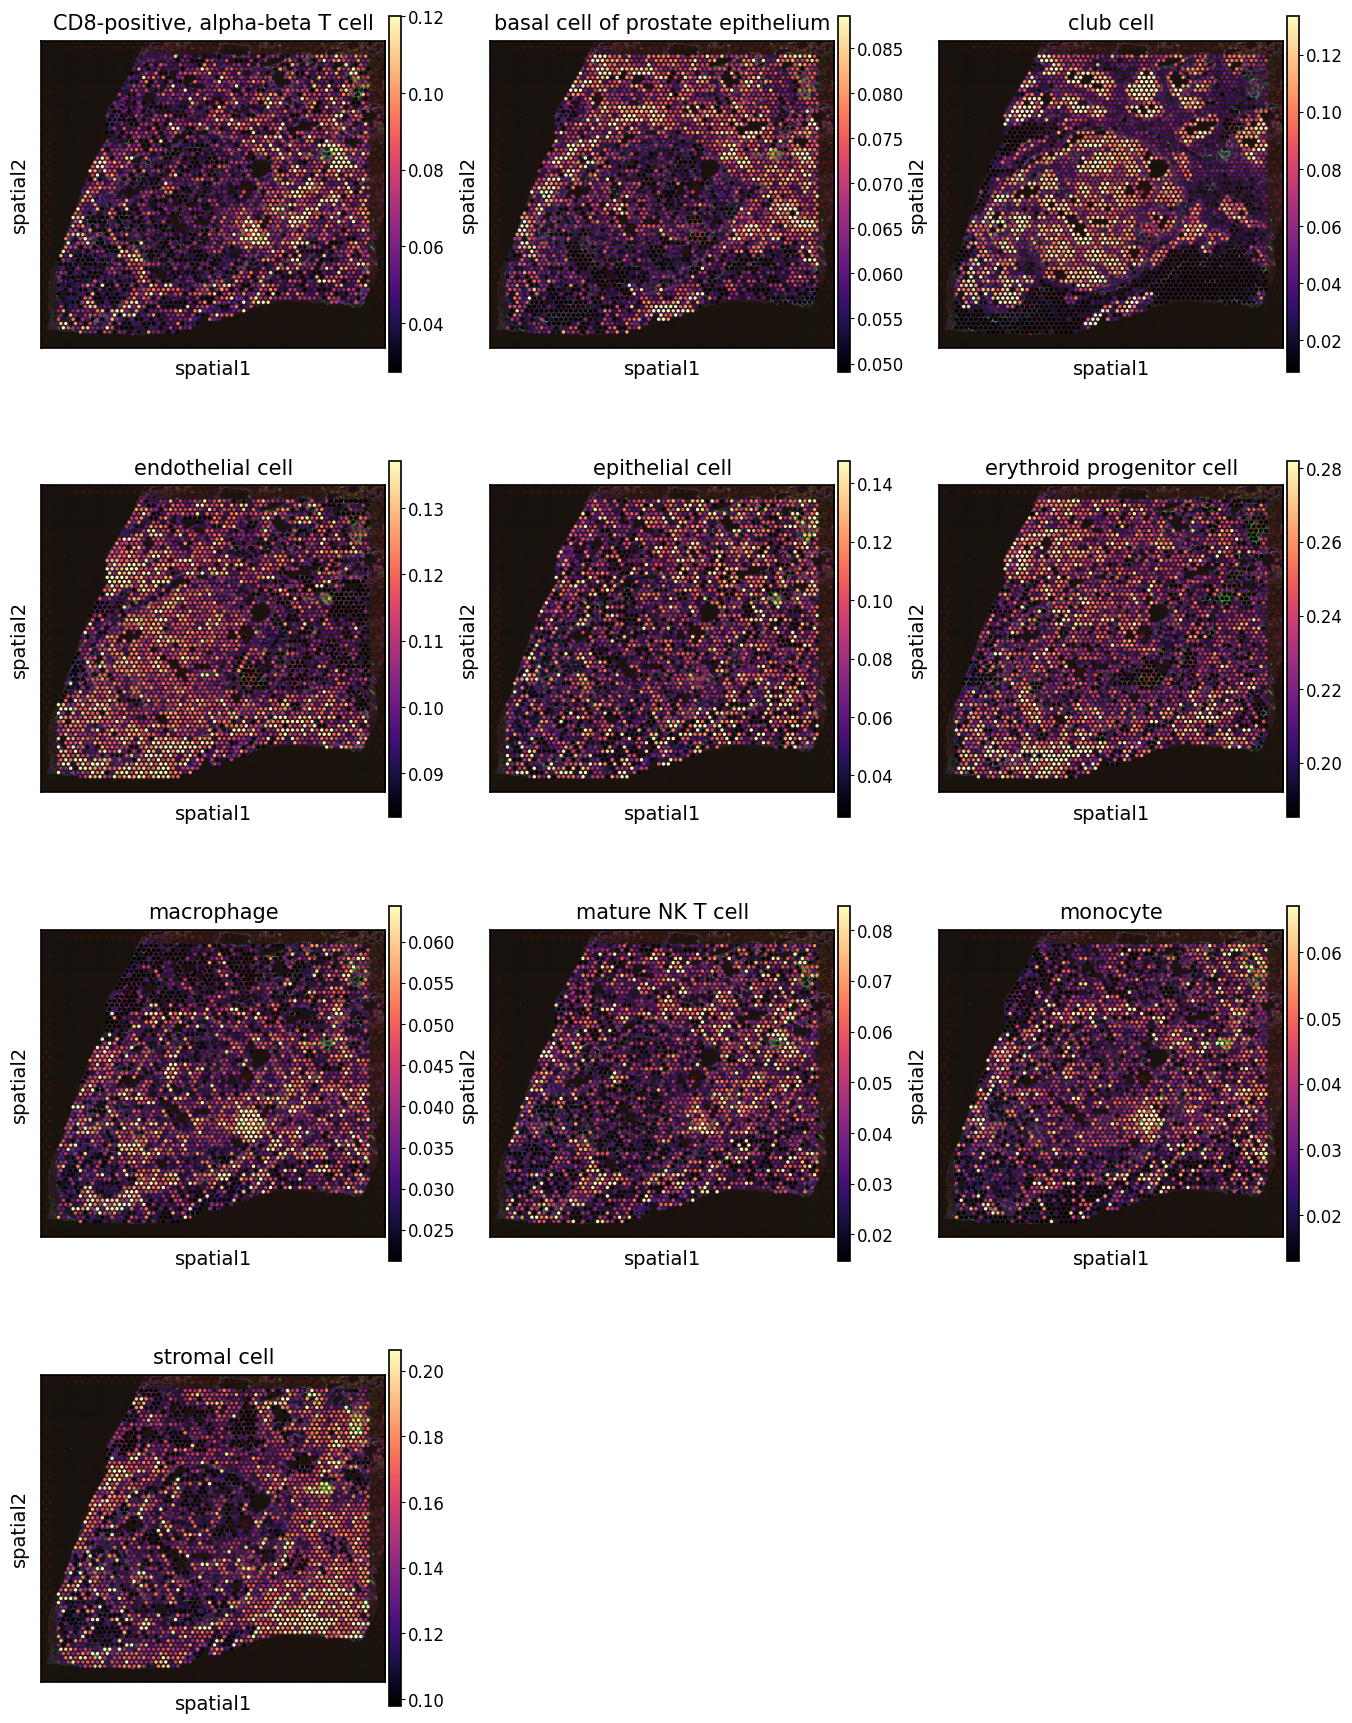

In [50]:
# select one slide
import matplotlib.pyplot as plt
from cell2location.utils import select_slide
slide = select_slide(st_adata_pre, 'Visium_FFPE_Human_Prostate_IF')

# plot in spatial coordinates
with plt.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(slide, cmap='magma',
                  # show first 8 cell types
                  color=ct_supplement,
                  ncols=3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  spot_size=200, vmin='p10', vmax='p95',
                  save='supp_fig_deconvolution.svg'
                 )

## For completeness other part of destVI evaluation.
We haven't used it here.

In [ ]:
# more globally, the values of the gamma are all summarized in this dictionary of data frames
for ct, g in st_model.get_gamma().items():
  st_adata_pre.obsm["{}_gamma".format(ct)] = g

In [ ]:
destvi_utils.explore_gamma_space(st_model, sc_model, ct_list=ct_list, ct_thresholds=ct_thresholds)

In [ ]:
plt.figure(figsize=(8, 8))

ct_name = "endothelial cell"
gene_name = ["HLA-A", "HLA-B", "PODXL", "LIFR", "TIMP3", "CLEC14A", "ITIH5", 'CCL23', 'IL33', 'MFAP4', 'SPINK13', 'ADGRL4', 'IFI27']

# we must filter spots with low abundance (consult the paper for an automatic procedure)
indices = np.where(st_adata_pre.obsm["proportions"][ct_name].values > 0.1)[0]

# impute genes and combine them
specific_expression = np.sum(st_model.get_scale_for_ct(ct_name, indices=indices)[gene_name], 1)
specific_expression = np.log(1 + 1e4 * specific_expression)

# plot (i) background (ii) g
plt.scatter(st_adata_pre.obsm["spatial"][:, 0], st_adata_pre.obsm["spatial"][:, 1], alpha=0.05)
plt.scatter(st_adata_pre.obsm["spatial"][indices][:, 0], st_adata_pre.obsm["spatial"][indices][:, 1], 
            c=specific_expression, s=10, cmap="Reds")
plt.colorbar()
plt.title(f"Imputation of {gene_name} in {ct_name}")
plt.show()

In [ ]:
for i in gene_name:
    print(i)
    # we must filter spots with low abundance (consult the paper for an automatic procedure)
    indices = np.where(st_adata_pre.obsm["proportions"][ct_name].values > 0.1)[0]

    # impute genes and combine them
    specific_expression = st_model.get_scale_for_ct(ct_name, indices=indices)[i]
    specific_expression = np.log(1 + 1e5 * specific_expression)

    # plot (i) background (ii) g
    plt.scatter(st_adata_pre.obsm["spatial"][:, 0], st_adata_pre.obsm["spatial"][:, 1], alpha=0.05)
    plt.scatter(st_adata_pre.obsm["spatial"][indices][:, 0], st_adata_pre.obsm["spatial"][indices][:, 1], 
                c=specific_expression, s=10, cmap="Reds")
    plt.colorbar()
    plt.show()

In [ ]:
specific_expression = st_model.get_scale_for_ct(ct_name)
color = np.log(1 + 1e5 * specific_expression["IFI27"].values)
threshold = 4.

mask = color > threshold
mask2 = color < threshold

_ = destvi_utils.de_genes(
    st_model, mask=mask, mask2=mask2, threshold=0.1, ct=ct_name, key="IFN_rich", key_proportions='proportions', st_adata=st_adata_pre
)

display(st_adata_pre.uns["IFN_rich"]["de_results"].head(30))

destvi_utils.plot_de_genes(
    st_adata_pre,
    interesting_genes=['CLEC14A', 'ADGRF5', 'CAVIN2', 'MYLK', 'IFI27'],
    key="IFN_rich",
)

In [307]:
ls ../../spleen/aligned/aligned

In [306]:
pwd

'/data/yosef2/users/can/PopV/pretrained_model_final'